# Gym Members Exercise Data

Data set: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("gym_members_exercise_tracking.csv")

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Let's first get an idea of which features are more correlated by viewing the correlation matrix:

In [6]:
df.corr()

C:\Users\10502190\AppData\Local\Temp\ipykernel_30608\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


We can plot some of these features together with a scatter plot:

<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

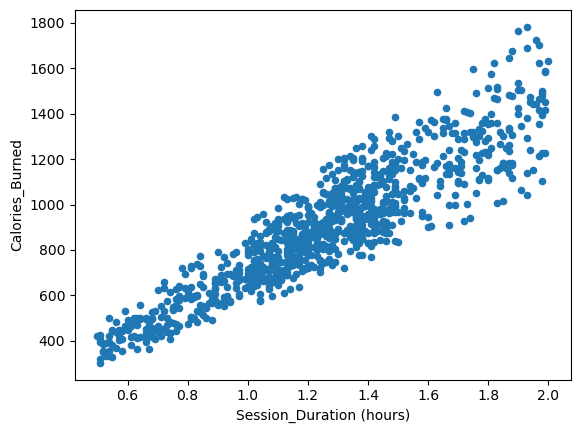

In [8]:
df.plot("Session_Duration (hours)", "Calories_Burned", kind="scatter")

<Axes: xlabel='Session_Duration (hours)', ylabel='Fat_Percentage'>

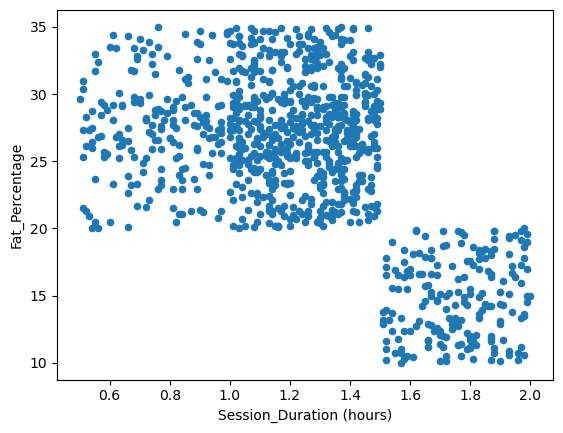

In [9]:
df.plot("Session_Duration (hours)", "Fat_Percentage", kind="scatter")

A simple way to visualize correlations is by using a **heat map**: 

C:\Users\10502190\AppData\Local\Temp\ipykernel_30608\1904392792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="PiYG")


<Axes: >

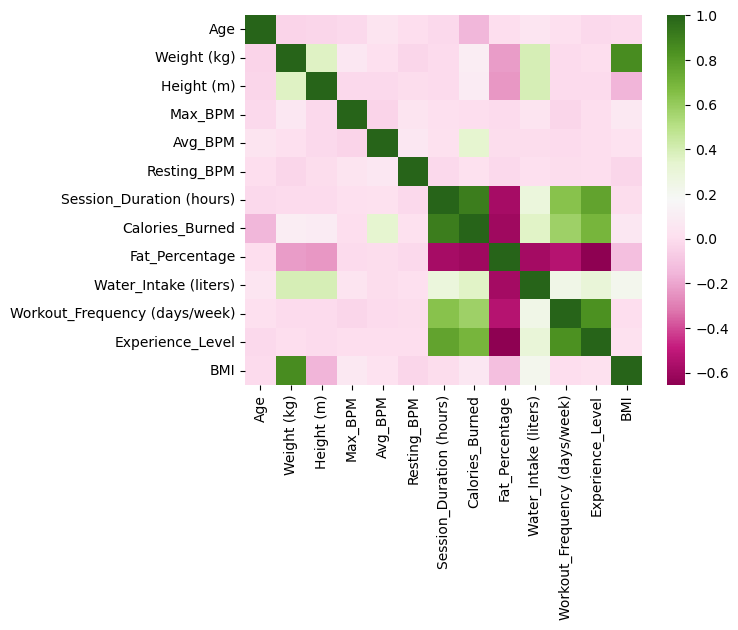

In [7]:
sns.heatmap(df.corr(), cmap="PiYG")

Let's focus on the handful of features that form the "box" in the lower-right corner:

<Axes: >

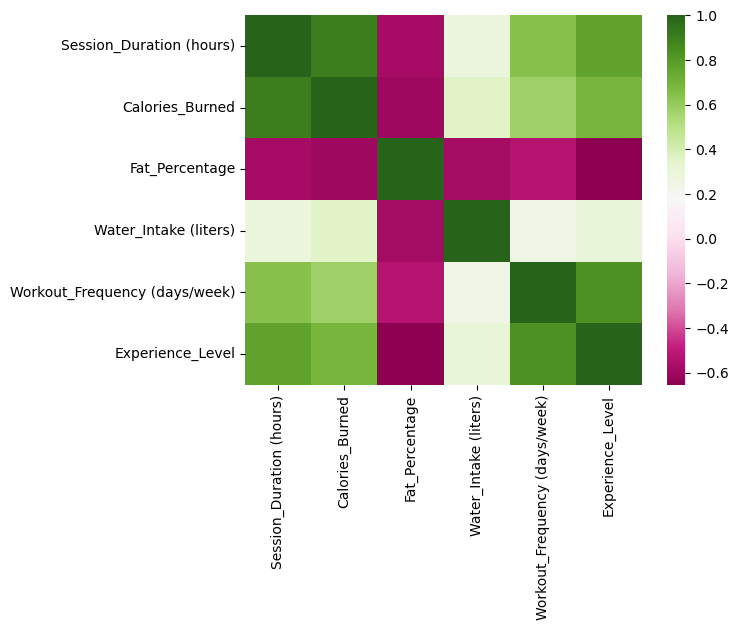

In [10]:
features = ["Session_Duration (hours)",
            "Calories_Burned",
            "Fat_Percentage",
            "Water_Intake (liters)",
            "Workout_Frequency (days/week)",
            "Experience_Level"]
select_df = df[features]

sns.heatmap(select_df.corr(), cmap="PiYG")

Since the correlation matrix is symmetric, we only need to show a triangle:
* Mask all values on the lower-right

<Axes: >

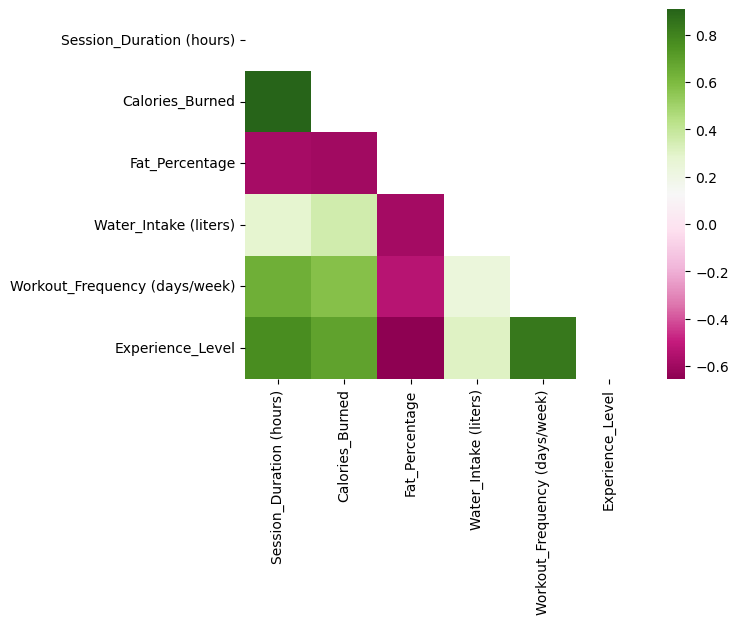

In [11]:
vals = select_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(vals, dtype=bool))

sns.heatmap(select_df.corr(), mask =mask, cmap="PiYG")

Plotting the correlogram using circles is a bit harder, but can be done:
* https://stackoverflow.com/questions/59381273/heatmap-with-circles-indicating-size-of-population 

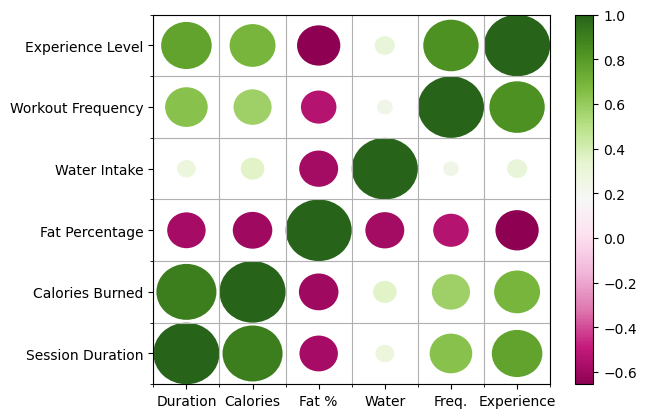

In [23]:
from matplotlib.collections import PatchCollection

labels = ["Session Duration",
          "Calories Burned",
          "Fat Percentage",
          "Water Intake",
          "Workout Frequency",
          "Experience Level"]
xlabels = ["Duration",
           "Calories",
           "Fat %",
           "Water",
           "Freq.",
           "Experience"]

vals = select_df.corr()
size = len(vals)

x, y = np.meshgrid(np.arange(size), np.arange(size))
R = np.array(vals.abs() / 2)

fig, ax = plt.subplots()

circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=np.array(vals).flatten(), cmap="PiYG")
ax.add_collection(col)

ax.set(xticks=np.arange(size), yticks=np.arange(size),
       xticklabels=xlabels, yticklabels=labels)
ax.set_xticks(np.arange(size+1)-0.5, minor=True)
ax.set_yticks(np.arange(size+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()


Some additional tweaks:

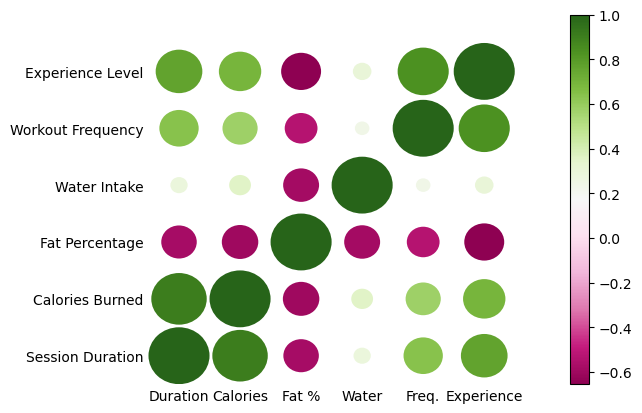

In [27]:
from matplotlib.collections import PatchCollection

labels = ["Session Duration",
          "Calories Burned",
          "Fat Percentage",
          "Water Intake",
          "Workout Frequency",
          "Experience Level"]
xlabels = ["Duration",
           "Calories",
           "Fat %",
           "Water",
           "Freq.",
           "Experience"]

vals = select_df.corr()
size = len(vals)

x, y = np.meshgrid(np.arange(size), np.arange(size))
R = np.array(vals.abs() / 2)

fig, ax = plt.subplots()

circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]




col = PatchCollection(circles, array=np.array(vals).flatten(), cmap="PiYG")
ax.add_collection(col)

ax.set(xticks=np.arange(size), yticks=np.arange(size),
       xticklabels=xlabels, yticklabels=labels)
# ax.set_xticks(np.arange(size+1)-0.5, minor=True)
# ax.set_yticks(np.arange(size+1)-0.5, minor=True)

ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis="both", length = 0)
# ax.grid(which='minor')

ax.set_xlim(-0.5, size)
ax.set_ylim(-0.5, size)

fig.colorbar(col)
plt.show()


Show upper triangle only:

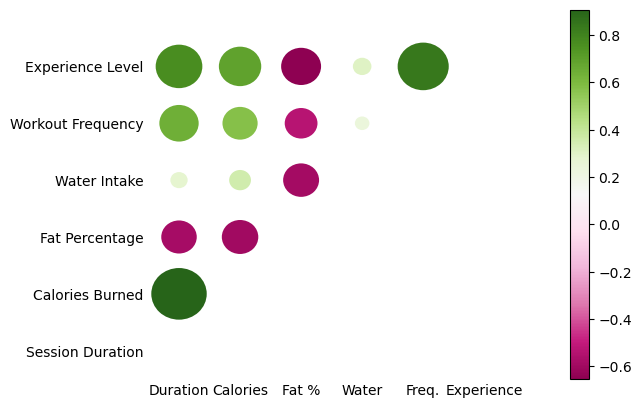

In [38]:
from matplotlib.collections import PatchCollection

labels = ["Session Duration",
          "Calories Burned",
          "Fat Percentage",
          "Water Intake",
          "Workout Frequency",
          "Experience Level"]
xlabels = ["Duration",
           "Calories",
           "Fat %",
           "Water",
           "Freq.",
           "Experience"]

vals = select_df.corr()
size = len(vals)

x, y = np.meshgrid(np.arange(size), np.arange(size))
R = np.array(vals.abs() / 2)

fig, ax = plt.subplots()

circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat) if i > j]
corr_vals = []
for i in range(size):
    for j in range(size):
        if i > j:
            corr_vals.append(vals.iloc[i].iloc[j])

col = PatchCollection(circles, array=corr_vals, cmap="PiYG")

ax.add_collection(col)

ax.set(xticks=np.arange(size), yticks=np.arange(size),
       xticklabels=xlabels, yticklabels=labels)
# ax.set_xticks(np.arange(size+1)-0.5, minor=True)
# ax.set_yticks(np.arange(size+1)-0.5, minor=True)

ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis="both", length = 0)
# ax.grid(which='minor')

ax.set_xlim(-0.5, size)
ax.set_ylim(-0.5, size)

fig.colorbar(col)
plt.show()


### Parallel Coordinates

Let's start by plotting two values together:  Session Duration to Calories Burned

In [39]:
# Just to remind myself
features = ["Session_Duration (hours)",
            "Calories_Burned",
            "Fat_Percentage",
            "Water_Intake (liters)",
            "Workout_Frequency (days/week)",
            "Experience_Level"]

# Number of lines to plot (may filter this later)
len(df)

973

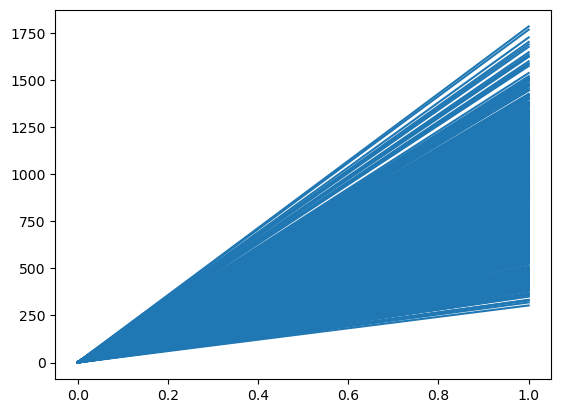

In [41]:
# create line chart
y_vals1 = list(df["Session_Duration (hours)"])
y_vals2 = list(df["Calories_Burned"])

fig, ax = plt.subplots()
for i in range(len(y_vals1)):
    # One line per pair
    ax.plot([0, 1], [y_vals1[i], y_vals2[i]], color="tab:blue" )

plt.show()

Two things to note:
* We should reduce the number of lines by filtering by a category (e.g. gender, age range) 
* We can **normalize** the scales for each input variable to be between 0 and 1 for comparison

19


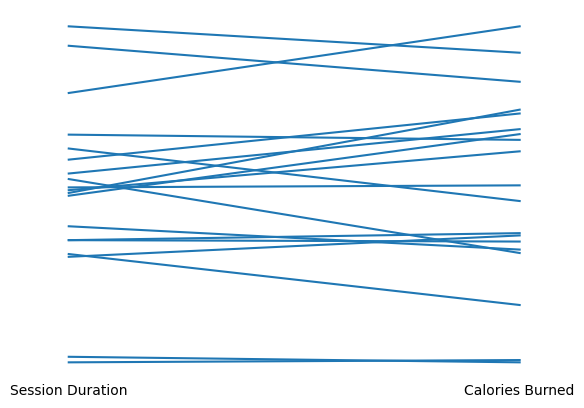

In [57]:
age_filter = df[df["Age"] == 30]
print(len(age_filter))


y_vals1 = list(age_filter["Session_Duration (hours)"])
y_vals2 = list(age_filter["Calories_Burned"])

# normalize values
max1 = max(y_vals1)
min1 = min(y_vals1)
y_vals1_norm = [(y - min1) / (max1 - min1) for y in y_vals1]

max2 = max(y_vals2)
min2 = min(y_vals2)
y_vals2_norm = [(y - min2) / (max2 - min2) for y in y_vals2]

# create line chart

fig, ax = plt.subplots()
for i in range(len(y_vals1)):
    # One line per pair
    ax.plot([0, 1], [y_vals1_norm[i], y_vals2_norm[i]], color="tab:blue" )
    
    
ax.set_xticks([0, 1])
ax.set_xticklabels(["Session Duration", "Calories Burned"])
ax.set_yticklabels([])
ax.tick_params(axis="both", length = 0)
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)


plt.show()


We can add more entries to the plot and do some additional formatting:

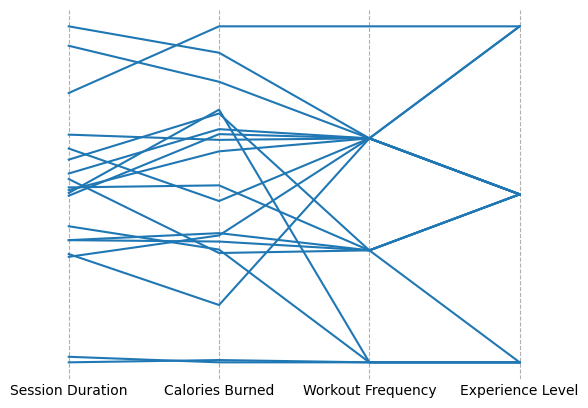

In [58]:
age_filter = df[df["Age"] == 30]
features = ["Session_Duration (hours)",
            "Calories_Burned",
            "Workout_Frequency (days/week)",
            "Experience_Level"]
y_val_lists = []

for f in features:
    y_vals1 = list(age_filter[f])

    # normalize values
    max1 = max(y_vals1)
    min1 = min(y_vals1)
    y_vals1_norm = [(y - min1) / (max1 - min1) for y in y_vals1]
    y_val_lists.append(y_vals1_norm)

# create line chart

fig, ax = plt.subplots()
for i in range(len(y_vals1)):
    # One line per pair
    ax.plot(list(range(len(features))), [y_val_lists[j][i] for j in range(len(features))], color="tab:blue" )
    
    
ax.set_xticks(list(range(len(features))))
ax.set_xticklabels(["Session Duration", "Calories Burned", "Workout Frequency", "Experience Level"])
ax.set_yticklabels([])

ax.tick_params(axis="both", length = 0)
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)

ax.grid(axis="x", linestyle = "--")

plt.show()


Without normalization:

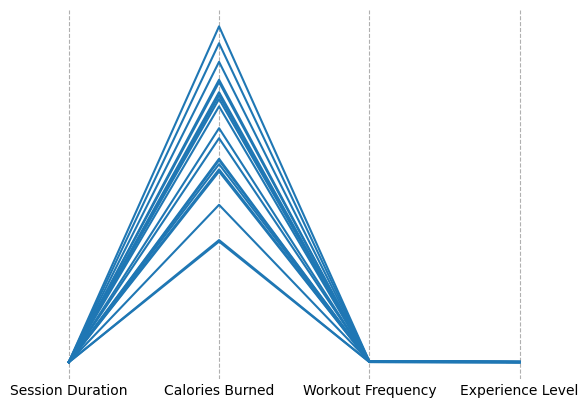

In [59]:
age_filter = df[df["Age"] == 30]
features = ["Session_Duration (hours)",
            "Calories_Burned",
            "Workout_Frequency (days/week)",
            "Experience_Level"]
y_val_lists = []

for f in features:
    y_vals1 = list(age_filter[f])
    y_val_lists.append(y_vals1)

# create line chart

fig, ax = plt.subplots()
for i in range(len(y_vals1)):
    # One line per pair
    ax.plot(list(range(len(features))), [y_val_lists[j][i] for j in range(len(features))], color="tab:blue" )
    
    
ax.set_xticks(list(range(len(features))))
ax.set_xticklabels(["Session Duration", "Calories Burned", "Workout Frequency", "Experience Level"])
ax.set_yticklabels([])

ax.tick_params(axis="both", length = 0)
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)

ax.grid(axis="x", linestyle = "--")


plt.show()
